#  Import necessary packages


In [1]:
%reload_ext nb_black
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.dummy import DummyClassifier
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, fbeta_score, classification_report
from sklearn.metrics import roc_curve, precision_recall_curve, roc_auc_score
%matplotlib inline


<IPython.core.display.Javascript object>

# Load and prepare the dataset


Load the training data into a DataFrame named df_train_data.


In [2]:
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/statlog/shuttle/shuttle.tst"
df_train_data = pd.read_csv(url, header=None, sep=" ")

<IPython.core.display.Javascript object>

In [3]:
df_train_data.head()

,0,1,2,3,4,5,6,7,8,9
0,55,0,81,0,-6,11,25,88,64,4
1,56,0,96,0,52,-4,40,44,4,4
2,50,-1,89,-7,50,0,39,40,2,1
3,53,9,79,0,42,-2,25,37,12,4
4,55,2,82,0,54,-6,26,28,2,1


<IPython.core.display.Javascript object>

In [4]:
# df_train_data.info()

<IPython.core.display.Javascript object>

Create binary classification problem; rename some class labels.


In [5]:
df_train_data.loc[df_train_data[9] != 4, 9] = 0
df_train_data.loc[df_train_data[9] == 4, 9] = 1

<IPython.core.display.Javascript object>

Create a DataFrame of nine features named X, drop column 9.


In [6]:
X = df_train_data.drop(columns=9)

<IPython.core.display.Javascript object>

In [28]:
X.head()

,0,1,2,3,4,5,6,7,8
0,55,0,81,0,-6,11,25,88,64
1,56,0,96,0,52,-4,40,44,4
2,50,-1,89,-7,50,0,39,40,2
3,53,9,79,0,42,-2,25,37,12
4,55,2,82,0,54,-6,26,28,2


<IPython.core.display.Javascript object>

Create a DataFrame of labels named y, select only column 9.


In [7]:
y = df_train_data[9]

<IPython.core.display.Javascript object>

In [27]:
# y.head()

<IPython.core.display.Javascript object>

Split the data into a training set and a test set.

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

<IPython.core.display.Javascript object>

In [9]:
X_train.shape[0]

10875

<IPython.core.display.Javascript object>

In [10]:
X_test.shape[0]

3625

<IPython.core.display.Javascript object>

# Create the model
Instantiate a logistic regression classifier with an lbfgs solver.


In [11]:
model = LogisticRegression(solver="lbfgs", penalty="none", max_iter=1000)

<IPython.core.display.Javascript object>

Fit the classifier to the data.

In [12]:
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, penalty='none')

<IPython.core.display.Javascript object>

# Calculate accuracy
Calculate and print the accuracy of the model on the test data.

In [13]:
model.score(X_test, y_test)

0.8253793103448276

<IPython.core.display.Javascript object>

# Dummy classifier
Use the dummy classifier to calculate the accuracy of a purely random chance.





In [14]:
dummy = DummyClassifier(strategy="uniform")
dummy.fit(X_train, y_train)
dummy.score(X_test, y_test)

0.5100689655172413

<IPython.core.display.Javascript object>

Compare this result to the result of the logistic regression classifier above. What does this result tell you?

The results tell us that the logistic regression model is performing about 33% more effectively than the dummy model.  

# Confusion matrix
Print the confusion matrix.

In [15]:
pred = model.predict(X_test)

confusion_mat = confusion_matrix(y_test, pred)
confusion_mat

array([[2945,  143],
       [ 490,   47]])

<IPython.core.display.Javascript object>

#  Plot a nicer confusion matrix (optional)
Use the plot_confusion_matrix() function from above to plot a nicer-looking confusion matrix.

In [16]:
def plot_confusion_matrix(
    cm, target_names, title="Confusion matrix", cmap=None, normalize=True
):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap("Blues")

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation="nearest", cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(
                j,
                i,
                "{:0.4f}".format(cm[i, j]),
                horizontalalignment="center",
                color="white" if cm[i, j] > thresh else "black",
            )
        else:
            plt.text(
                j,
                i,
                "{:,}".format(cm[i, j]),
                horizontalalignment="center",
                color="white" if cm[i, j] > thresh else "black",
            )

    plt.tight_layout()
    plt.ylabel("Predicted label")
    plt.xlabel(
        "True label\naccuracy={:0.4f}; misclass={:0.4f}".format(accuracy, misclass)
    )
    plt.show()

<IPython.core.display.Javascript object>

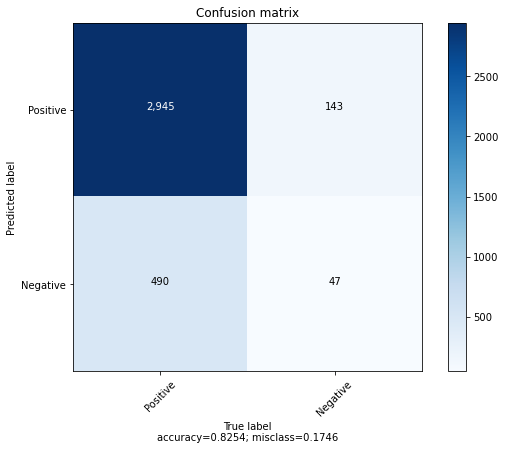

<IPython.core.display.Javascript object>

In [17]:
plot_confusion_matrix(
    cm=confusion_mat,
    target_names=["Positive", "Negative"],
    title="Confusion matrix",
    normalize=False,
)

# Calculate metrics
Print the F₁, Fᵦ, precision, recall, and accuracy scores.

In [18]:
f1 = f1_score(y_test, pred)
f_beta = fbeta_score(y_test, pred, beta=0.5)
precision = precision_score(y_test, pred)
recall = recall_score(y_test, pred)
accuracy = accuracy_score(y_test, pred)

<IPython.core.display.Javascript object>

In [19]:
print(
    "f1 score: {}, f-beta score: {}, precision score: {}, recall score: {}, accuracy score :{}".format(
        f1, f_beta, precision, recall, accuracy
    )
)

f1 score: 0.1292984869325997, f-beta score: 0.1811873554356207, precision score: 0.24736842105263157, recall score: 0.08752327746741155, accuracy score :0.8253793103448276


<IPython.core.display.Javascript object>

# Print a classification report
 


In [20]:
class_report = classification_report(
    y_test, pred, target_names=["Negative", "Positive"]
)
print(class_report)

              precision    recall  f1-score   support

    Negative       0.86      0.95      0.90      3088
    Positive       0.25      0.09      0.13       537

    accuracy                           0.83      3625
   macro avg       0.55      0.52      0.52      3625
weighted avg       0.77      0.83      0.79      3625



<IPython.core.display.Javascript object>

# 10. Plot the ROC curve and AUC
Calculate AUC and plot the curve.



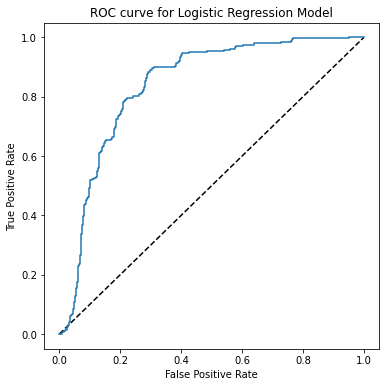

AUC: 0.8392304927586572


<IPython.core.display.Javascript object>

In [21]:
probs = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, probs)
fig = plt.figure(figsize=(6, 6))
plt.plot([0, 1], [0, 1], "k--")
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC curve for Logistic Regression Model")
plt.show()

auc = roc_auc_score(y_test, probs)
print("AUC: {}".format(auc))

# 11. Plot precision-recall curve
Plot the precision-recall curve for the model above.

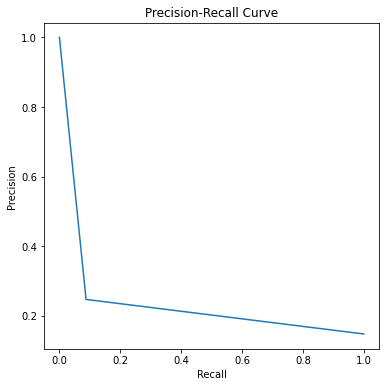

<IPython.core.display.Javascript object>

In [22]:
pres, rec, thresholds = precision_recall_curve(y_test, pred)
fig = plt.figure(figsize=(6, 6))
plt.plot(rec, pres)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.show()

Find the best value for C in the logistic regression classifier for avoiding overfitting. Plot the training and testing accuracy over a range of C values from 0.05 to 1.5.

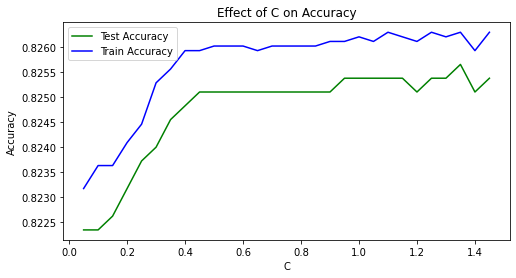

<IPython.core.display.Javascript object>

In [23]:
c_vals = np.arange(0.05, 1.5, 0.05)
test_accuracy = []
train_accuracy = []

for c in c_vals:
    lr = LogisticRegression(solver="lbfgs", penalty="l2", C=c, max_iter=1000)
    lr.fit(X_train, y_train)
    test_accuracy.append(lr.score(X_test, y_test))
    train_accuracy.append(lr.score(X_train, y_train))

fig = plt.figure(figsize=(8, 4))
ax1 = fig.add_subplot(1, 1, 1)
ax1.plot(c_vals, test_accuracy, "-g", label="Test Accuracy")
ax1.plot(c_vals, train_accuracy, "-b", label="Train Accuracy")
ax1.set(xlabel="C", ylabel="Accuracy")
ax1.set_title("Effect of C on Accuracy")
ax1.legend()
plt.show()

The best C value is around 1.35

# 12. Cross-validation
Perform five-fold cross-validation for a logistic regression classifier. Print the five accuracy scores and the mean validation score.



In [24]:
clf = LogisticRegression(solver="lbfgs", max_iter=1000)
cv_scores = cross_val_score(clf, X_train, y_train, cv=5)

<IPython.core.display.Javascript object>

In [25]:
print("CV Score: {}".format(cv_scores))
print("Mean Validation Score: {}".format(cv_scores.mean()))

CV Score: [0.83172414 0.82666667 0.81655172 0.83172414 0.82206897]
Mean Validation Score: 0.8257471264367815


<IPython.core.display.Javascript object>

# 13. Is this really linear?
Your linear classifier is not giving you better accuracy than the dummy classifier. Suppose that the data was not linearly separable. Instantiate and train a KNN model with k = 7. How does the accuracy of the KNN model compare to the logistic regression from above? What does that tell you about the data?



In [29]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)
knn_score = knn.score(X_test, y_test)
print("KNN score: {}".format(knn_score))

KNN score: 0.9983448275862069


<IPython.core.display.Javascript object>

Since the accuracy of the KNN score is significantly higher than the Logistic Regression score, this tells us that the relationship between the variables is not linear. 

# 14. Random forest
Next, instantiate and fit a random forest classifier and calculate the accuracy of that model.

In [30]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_score = rf.score(X_test, y_test)
print('Random Forest Classifier Score: {}'.format(rf_score))


Random Forest Classifier Score: 1.0


<IPython.core.display.Javascript object>